<a href="https://colab.research.google.com/github/uavinash15/DataScience-/blob/main/Notebooks/Clustering/CREATING_PRODUCT_SEGMENTS_USING_CLUSTERING_Beer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREATING PRODUCT SEGMENTS USING CLUSTERING**

In [947]:
import pandas as pd

In [948]:
beer_df=pd.read_csv('beer.csv')
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


# Normalization

In [949]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [950]:
scaler=StandardScaler()
scaled_beer_df=scaler.fit_transform(beer_df[["calories","sodium","alcohol","cost"]])
scaled_beer_df

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

Using Dendrogram

In [951]:
import seaborn as sn

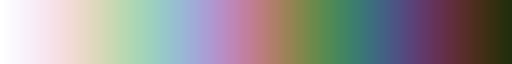

In [952]:
cmap=sn.cubehelix_palette(as_cmap=True,rot=-3,light=1)
cmap

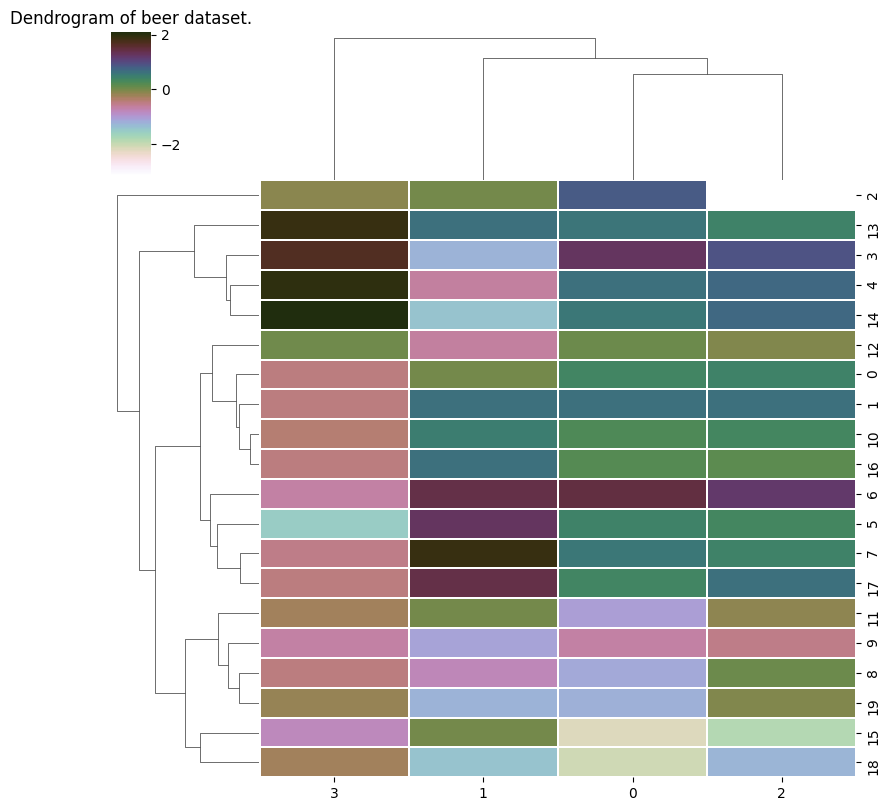

In [953]:
sn.clustermap(scaled_beer_df,cmap=cmap,linewidths=0.2,figsize=(8,8))
plt.title('Dendrogram of beer dataset.')
plt.show()

In [954]:
beer_df.iloc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [955]:
beer_df.iloc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


# **Elbow Curve**

Finding Optimal Number of Clusters Using Elbow Curve Method

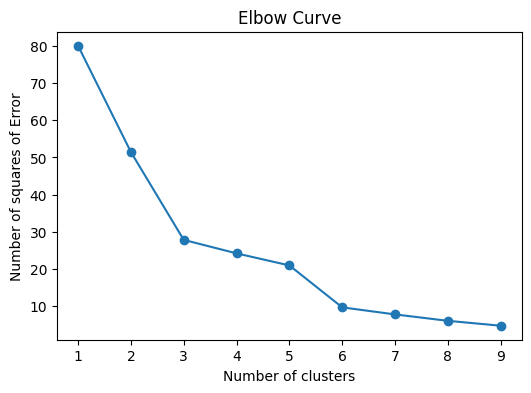

In [956]:
from sklearn.cluster import KMeans
cluster_range=range(1,10)
cluster_errors=[]
for num_clusters in cluster_range:
  #print(num_clusters)
  clusters=KMeans(num_clusters)
  clusters.fit(scaled_beer_df)
  cluster_errors.append(clusters.inertia_)
  #print(cluster_errors)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Number of squares of Error')
plt.title('Elbow Curve')
plt.show()

Normalizing the Features

In [957]:
scaler=StandardScaler()
scaled_beer_df=scaler.fit_transform(beer_df[['calories','sodium','alcohol','cost']])

# Creating Clusters

In [958]:
k=3
clusters=KMeans(k,random_state=42)
#clusters
#scaled_beer_df
clusters.fit(scaled_beer_df)
#clusters
beer_df["clusterid"]=clusters.labels_

In [959]:
beer_df

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,2
3,Kronenbourg,170,7,5.2,0.73,1
4,Heineken,152,11,5.0,0.77,1
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1


 Interpreting the Clusters

**Cluster 0:**

In [960]:
clst0=beer_df[beer_df.clusterid==0]
clst0

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
13,Becks,150,19,4.7,0.76,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [961]:
clst0['calories'].mean()

np.float64(148.55555555555554)

In [962]:
clst0['sodium'].mean()

np.float64(20.88888888888889)

In [963]:
clst0['alcohol'].mean()

np.float64(4.777777777777779)

In [964]:
clst0['cost'].mean()

np.float64(0.4466666666666666)

**Cluster 1:**

In [965]:
clst1=beer_df[beer_df.clusterid==1]
clst1

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,1
4,Heineken,152,11,5.0,0.77,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
14,Kirin,149,6,5.0,0.79,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [966]:
clst1['calories'].mean()

np.float64(115.7)

In [967]:
clst1['sodium'].mean()

np.float64(9.6)

In [968]:
clst1['alcohol'].mean()

np.float64(4.09)

In [969]:
clst1['cost'].mean()

np.float64(0.5389999999999999)

In [970]:
clst2=beer_df[beer_df.clusterid==2]
clst2

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,2


In [971]:
# caories:2>0>1>
# sodium: 0>1>2
# alchohol:0>1>2
# cost: 0<1>2

# **HIERARCHICAL CLUSTERING**

In [972]:
from sklearn.cluster import AgglomerativeClustering

In [973]:
h_clusters=AgglomerativeClustering(k)
h_clusters.fit(scaled_beer_df)
beer_df["h_clusterid"]=h_clusters.labels_
beer_df

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,2,0
3,Kronenbourg,170,7,5.2,0.73,1,2
4,Heineken,152,11,5.0,0.77,1,2
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0


In [974]:
hclst0=beer_df[beer_df.h_clusterid==0]
hclst0

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,2,0
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
11,Coors_Light,102,15,4.1,0.46,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0


In [975]:
hclst0['calories'].mean()

np.float64(105.375)

In [976]:
hclst0['sodium'].mean()

np.float64(10.875)

In [977]:
hclst0['alcohol'].mean()

np.float64(3.325)

In [978]:
hclst0['cost'].mean()

np.float64(0.4475)

In [979]:
hclst1=beer_df[beer_df.h_clusterid==1]
hclst1

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
16,Hamms,139,19,4.4,0.43,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1


In [980]:
hclst1['calories'].mean()

np.float64(148.375)

In [981]:
hclst1['sodium'].mean()

np.float64(21.125)

In [982]:
hclst1['alcohol'].mean()

np.float64(4.7875000000000005)

In [983]:
hclst1['cost'].mean()

np.float64(0.4075)

In [984]:
hclst2=beer_df[beer_df.h_clusterid==2]
hclst2

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,1,2
4,Heineken,152,11,5.0,0.77,1,2
13,Becks,150,19,4.7,0.76,0,2
14,Kirin,149,6,5.0,0.79,1,2


In [985]:
hclst2['calories'].mean()

np.float64(155.25)

In [986]:
hclst2['sodium'].mean()

np.float64(10.75)

In [987]:
hclst2['alcohol'].mean()

np.float64(4.975)

In [988]:
hclst2['cost'].mean()

np.float64(0.7625)

In [989]:
# calories:0<1<2
# sodium: 0<1>2
# alcohol:0<1<2
# cost: 0>1<2

# **Hierarchical Clustering Dendrogram**

**standardize data: z score transform**

In [990]:
beer=pd.read_csv('beer.csv')

In [991]:
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [992]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [993]:
df_norm=norm_func(beer.iloc[:,1:])
df_norm

,calories,sodium,alcohol,cost
0,0.710280,0.428571,0.826087,0.294118
1,0.775701,0.619048,0.869565,0.294118
2,0.831776,0.428571,0.000000,0.392157
3,0.953271,0.047619,0.934783,0.882353
4,0.785047,0.238095,0.891304,0.960784
5,0.719626,0.809524,0.804348,0.000000
6,1.000000,0.857143,1.000000,0.235294
7,0.757009,1.000000,0.826087,0.274510
8,0.289720,0.190476,0.739130,0.294118
9,0.420561,0.095238,0.608696,0.235294


In [994]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
data=pd.DataFrame(trans.fit_transform(df_norm))
data

,0,1,2,3
0,0.710280,0.428571,0.826087,0.294118
1,0.775701,0.619048,0.869565,0.294118
2,0.831776,0.428571,0.000000,0.392157
3,0.953271,0.047619,0.934783,0.882353
4,0.785047,0.238095,0.891304,0.960784
5,0.719626,0.809524,0.804348,0.000000
6,1.000000,0.857143,1.000000,0.235294
7,0.757009,1.000000,0.826087,0.274510
8,0.289720,0.190476,0.739130,0.294118
9,0.420561,0.095238,0.608696,0.235294


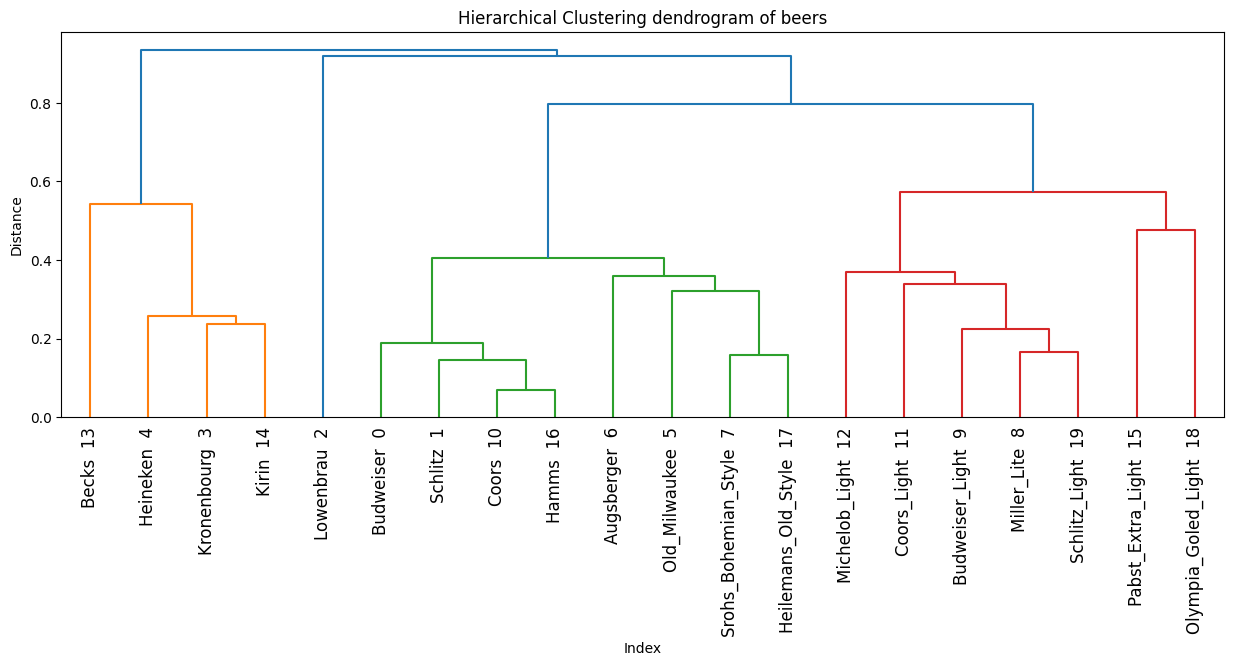

In [995]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df_norm,method='average',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierarchical Clustering dendrogram of beers")
plt.xlabel("Index")
plt.ylabel("Distance")
labels=[f"{name}  {i}" for i,name in enumerate(beer['name'].tolist())]
sch.dendrogram(z,labels=labels,leaf_rotation=90)
plt.show()